In [155]:
%matplotlib inline

In [156]:
import matplotlib.pyplot as plt
import numpy as np

import pycollocation

In [ ]:
# provide numerical values for the parameters
params = {'dz0': 130, 'uAhx': 70, 'U': 1.0}

params = {}


dz0 = 130
uAhx = 70
U = 1


def q(dz, u):
    return (dz - u) * U



def f1(dz, u):
    return -q(dz, u)

def f2(dz, u):
    return -0.5*q(dz, u)



def f2(dz, u):
    return -10 * u

def f1(dz, u):
    return dz + u

def rhs(A, dz, u, **params):
    return [f1(dz, u), f2(dz, u)]

def bcs_lower(A, dz, u, **params):
    print("lower", dz)
    return [dz - 2]

def bcs_upper(A, dz, u, **params):
    print("upper", dz, u)
    return [dz + u]

In [158]:
problem = pycollocation.problems.TwoPointBVP(bcs_lower, bcs_upper, 1, 2, params, rhs)

In [159]:
def initial_mesh(domain, num, problem):
    As = np.linspace(domain[0], domain[1], num)
    guess = np.repeat(1, num)
    return As, guess, guess


In [160]:
polynomial_basis = pycollocation.basis_functions.PolynomialBasis()
solver = pycollocation.solvers.Solver(polynomial_basis)

basis_kwargs = {'kind': 'Chebyshev', 'domain': [0, 1.0], 'degree': 30}

As, dzs, us = initial_mesh(basis_kwargs['domain'], 1000, problem)
dz_poly = polynomial_basis.fit(As, dzs, **basis_kwargs)
u_poly = polynomial_basis.fit(As, us, **basis_kwargs)
initial_coefs = np.hstack([dz_poly.coef, u_poly.coef])




# solution = solver.solve(basis_kwargs, initial_coefs, problem)


boundary_points = (0, 1)
nodes = polynomial_basis.roots(**basis_kwargs)
solution = solver.solve(basis_kwargs, boundary_points, initial_coefs, nodes, problem)


lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 1.0000000149010544
upper 1.000000014901152 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.9999999999999909 0.9999999999999909
lower 0.9999999999998934
upper 0.99

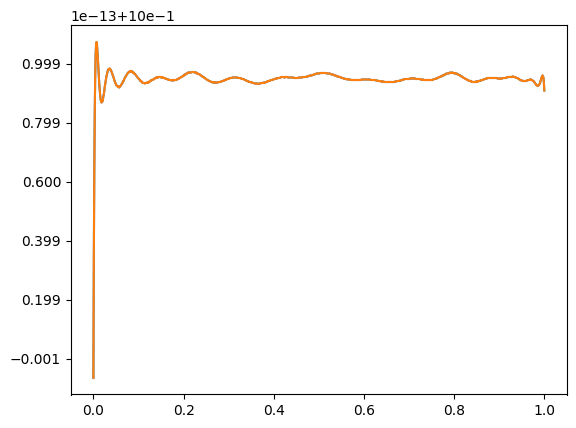

In [161]:
dz_soln, u_soln = solution.evaluate_solution(As)
plt.plot(As, dz_soln)
plt.plot(As, u_soln)
plt.show()

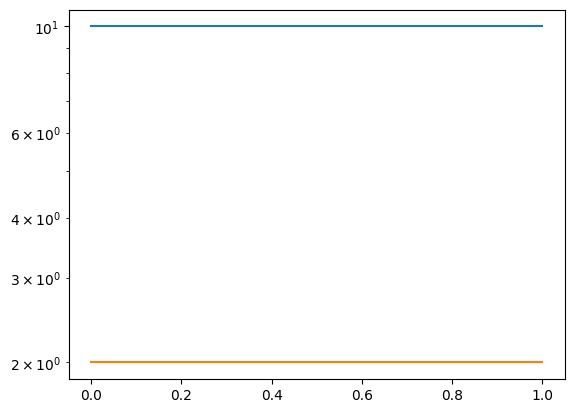

In [162]:
dz_normalized_resids, u_normalized_resids = solution.normalize_residuals(As)
plt.plot(As, np.abs(dz_normalized_resids))
plt.plot(As, np.abs(u_normalized_resids))
plt.yscale('log')
plt.show()